In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.linalg import eig_banded
from scipy.special import erf
from scipy.fftpack import ifft
%matplotlib inline

In [2]:
def gauss_legendre(n):
    # Computes the Gaussian Quadrature nodes and weights
    # Input:  n = number of nodes and weights requested
    # Output: x nodes and w weights
    
    k = np.arange(1,n)
    a_band = np.zeros((2,n))
    a_band[1,:n-1] = k/np.sqrt(4*k*k-1) 
    x,V = eig_banded(a_band,lower=True) 
    w = 2*np.real(V[0,:]**2) 
    return x, w

def cheb(n1):
    # Computes the Clenshaw Curtis (Chebyshev) nodes and weights
    # Input:  n1 = number of nodes and weights requested
    # Output: x nodes and w weights
    # Note that these nodes include the endpoints
    
    if n1 == 1:
        x = 0
        w = 2
    else:
        n = n1 - 1
        C = np.zeros((n1,2))
        k = 2*(1+np.arange(np.floor(n/2)))
        # Compute weights --> integral of Tn(x)
        C[::2,0] = 2/np.hstack((1, 1-k*k))
        C[1,1] = -n
        V = np.vstack((C,np.flipud(C[1:n,:])))
        # Real part of inverse FFT ~ Cosine transform
        F = np.real(ifft(V, n=None, axis=0))
        x = F[:n1,1]
        #x = -np.cos(np.linspace(0,np.pi,n1))
        w = np.hstack((F[0,0],2*F[1:n,0],F[n,0]))
    return x, w

def transint(a,b,x,w):
    return (a+b+x*(b-a))/2, (b-a)*w/2



def gauss_quad(func,a,b,n):
    x, w = gauss_legendre(n)
    x, w = transint(a,b,x,w)
    return w.dot(func(x))


def clen_quad(func, a, b, n):
    x, w = cheb(n)
    x, w = transint(a,b,x,w)
    return w.dot(func(x))


def f(x):
    return x**20

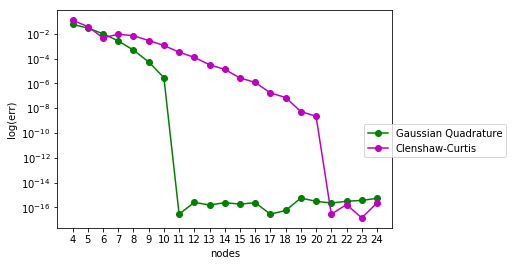

In [3]:
# ******************************************************************************
test = 2/21 #<-- Change the test solution each time you change the exponent above
# ******************************************************************************
errg = [] # Gaussian Quadrature error array
errc = [] # Clenshaw-Curtis Quadrature error array
a,b = -1, 1;
nvec = np.arange(4,25,1) # Requires odd number of nodes (even number of subintervals)
# Construct a vector of errors and display them for the increasing grid-sizes
for n in nvec:
    #xg, wg = gauss_legendre(n)
    #xc, wc = cheb(n)
    Igauss = gauss_quad(f, a, b, n)
    Iclen = clen_quad(f, a, b, n)
    errg = np.append(errg,abs(Igauss-test))#+np.finfo(float).eps
    errc = np.append(errc,abs(Iclen-test))#+np.finfo(float).eps
plt.semilogy(nvec,errg,'go-',nvec,errc,'mo-')
plt.legend(['Gaussian Quadrature','Clenshaw-Curtis'],loc='center left',bbox_to_anchor=(0.9,0.4)) 
plt.xlabel('nodes')
plt.ylabel('log(err)')
plt.xticks(nvec);




In [4]:
# Part 2
def f(x):
    return np.e**(np.sin(np.pi*x))

In [5]:
# Trap func
def Trapezoidal(fx, a, b, n):
    x = np.linspace(a, b, n)
    y = f(x)
    h = (b-a)/(n-1)
    w = np.ones(n)
    w[0], w[-1] = 0.5, 0.5
    I = h*np.dot(w,y)
    return I

#Simp func
def Simpsons(fx, a, b, n):
    x = np.linspace(a, b, n)
    y = f(x)
    h = (b-a)/(n-1)
    w = np.ones(n)
    w[2:-2:2] = 2
    w[1:-1:2] = 4
    I = h/3*np.dot(w,y)
    return I

def g(x):
    return np.exp(np.cos(np.pi*x))

In [6]:
actualVal = sp.iv(0,1)
trapError = np.fabs(Trapezoidal(f, 0, 1, 9) - actualVal)
simpError = np.fabs(Simpsons(f, 0, 1, 9) - actualVal)
gaussError = np.fabs(gauss_quad(f, 0, 1, 9) - actualVal)
clenError = np.fabs(clen_quad(f, 0, 1, 9) - actualVal)
print("Absolute Error of Trapezoidal:         ",trapError)
print("Absolute Error of Simpsons:            ",simpError)
print("Absolute Error of Gaussian Quadrature: ",gaussError)
print("Absolute Error of Clenshaw Quadrature: ",clenError)

Absolute Error of Trapezoidal:          0.702062589258
Absolute Error of Simpsons:             0.710229428949
Absolute Error of Gaussian Quadrature:  0.710243199303
Absolute Error of Clenshaw Quadrature:  0.710247642921


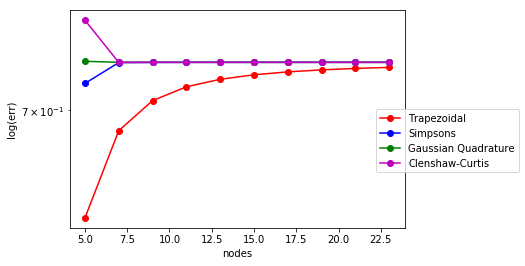

In [7]:
# ******************************************************************************
test = sp.iv(0,1) #<-- Change the test solution each time you change the exponent above
# ******************************************************************************
errt = [] # Trapezoidal rule error array
errs = [] # Simpson's rule error array
errg = [] # Gaussian Quadrature error array
errc = [] # Clenshaw-Curtis Quadrature error array
a,b = 0, 1;
nvec = np.arange(5,24,2) # Requires odd number of nodes (even number of subintervals)
# Construct a vector of errors and display them for the increasing grid-sizes
for n in nvec:
    Itrap = Trapezoidal(f, a, b, n)
    Isimp = Simpsons(f, a, b, n)
    Igauss = gauss_quad(f, a, b, n)
    Iclen = clen_quad(f, a, b, n)
    errt = np.append(errt,abs(Itrap-test))+np.finfo(float).eps
    errs = np.append(errs,abs(Isimp-test))+np.finfo(float).eps
    errg = np.append(errg,abs(Igauss-test))+np.finfo(float).eps
    errc = np.append(errc,abs(Iclen-test))+np.finfo(float).eps
plt.semilogy(nvec,errt,'ro-',nvec,errs,'bo-',nvec,errg,'go-',nvec,errc,'mo-')
plt.legend(['Trapezoidal','Simpsons','Gaussian Quadrature','Clenshaw-Curtis'],loc='center left',bbox_to_anchor=(0.9,0.4)) 
plt.xlabel('nodes')
plt.ylabel('log(err)');